日付を入力してください(例:20231118):  20231125
測定回数を入力してください(例:1):  1
測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u):  s
圧力を入力してください(例:6):  8
測定方法を入力してください(d or s or p):  d


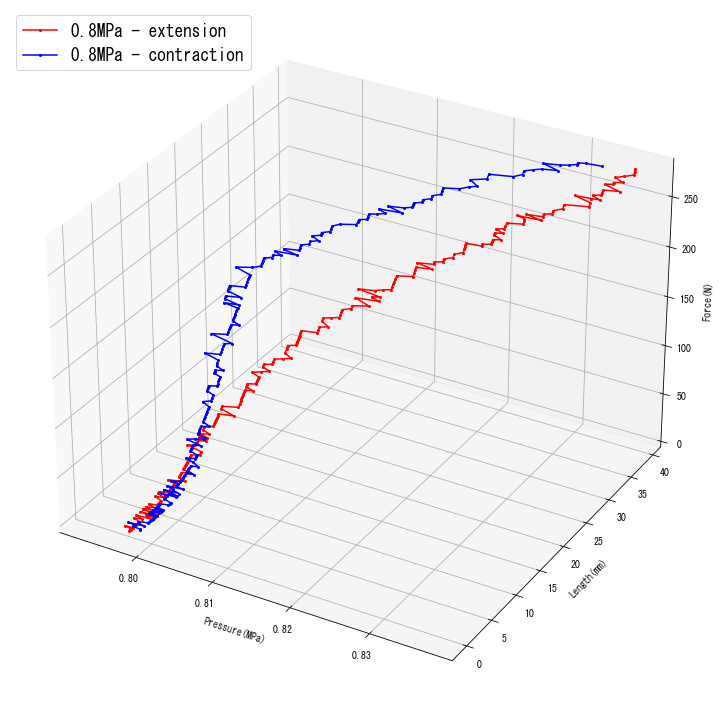

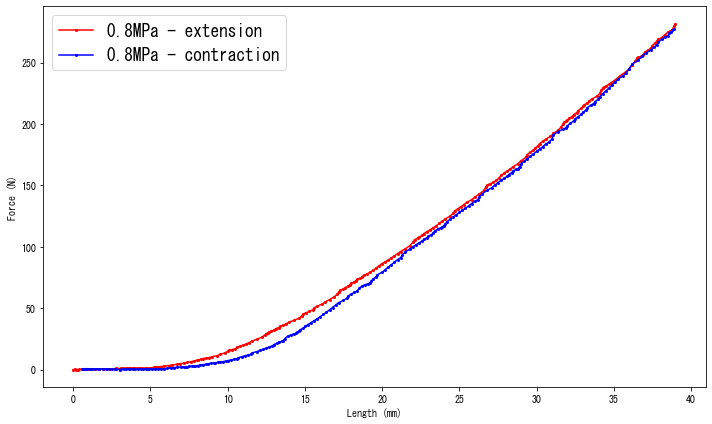

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

# ユーザー入力してもらう
current_date = input("日付を入力してください(例:20231118): ")
file_count = input("測定回数を入力してください(例:1): ")  
measurement_kind = input("測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")  
pressure_input = input("圧力を入力してください(例:6): ")  

# Convert pressure_input to the desired format (e.g., 6 to 0.6)
pressure = f'0.{pressure_input}'  

measurement_method = input("測定方法を入力してください(d or s or p): ")

plt.rcParams['font.family'] = 'MS Gothic'

# データの読み込み
dt = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}_{measurement_kind}_{pressure}_{measurement_method}.csv")
#dt = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}_{measurement_kind}_{pressure}_{measurement_method}.csv")

# 列の選択
column = dt[["Pressure", "Length", "Force"]]

# 最初のPressureデータを取得して四捨五入
first_pressure = round(column["Pressure"].iloc[0], 2)  # 少数第三位を四捨五入

# グラフの作成
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 最初のデータからForceが最大値を取るデータまでの範囲（赤色）
ax.plot(column["Pressure"].iloc[:column["Force"].idxmax() + 1], 
        column["Length"].iloc[:column["Force"].idxmax() + 1], 
        column["Force"].iloc[:column["Force"].idxmax() + 1], 
        c='r', marker='o', markersize=2, label=f'{first_pressure}MPa - extension')

# Forceが最大値を取ったデータから最後のデータまでの範囲（青色）
ax.plot(column["Pressure"].iloc[column["Force"].idxmax() + 1:], 
        column["Length"].iloc[column["Force"].idxmax() + 1:], 
        column["Force"].iloc[column["Force"].idxmax() + 1:], 
        c='b', marker='o', markersize=2, label=f'{first_pressure}MPa - contraction')

# 軸ラベルの設定
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

# x軸のメモリフォーマットと設定
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 少数第二位まで表示

# 凡例の表示
ax.legend(loc='upper left', fontsize='xx-large')

# グラフの保存
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\single\\single_{current_date}_{file_count}_{measurement_kind}_{pressure}_{measurement_method}-1.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\single\\single_{current_date}_{file_count}_{measurement_kind}_{pressure}_{measurement_method}-1.jpg'
plt.savefig(save_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


# 以下2D

# 列の選択（Pressure列を削除）
column = dt[["Length", "Force"]]

# 最初のPressureデータを取得して四捨五入
first_pressure = round(dt["Pressure"].iloc[0], 2)  # 少数第三位を四捨五入

# 二次元プロット
fig, ax = plt.subplots(figsize=(10, 6))

# Forceが最大値を取るまでの範囲を赤でプロット
ax.plot(column["Length"][:dt["Force"].idxmax() + 1], column["Force"][:dt["Force"].idxmax() + 1], c='r', marker='o', markersize=2, label=f'{first_pressure}MPa - extension')

# Forceが最大値を取った後の範囲を青でプロット
ax.plot(column["Length"][dt["Force"].idxmax() + 1:], column["Force"][dt["Force"].idxmax() + 1:], c='b', marker='o', markersize=2, label=f'{first_pressure}MPa - contraction')

# 軸ラベルの設定
ax.set_xlabel('Length (mm)')
ax.set_ylabel('Force (N)')

# 軸のメモリのフォーマットおよび設定
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# 凡例の表示
ax.legend(loc='upper left', fontsize='xx-large')

# 保存パスとファイル名を指定してグラフを画像として保存（JPG形式）
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\single\\single_{current_date}_{file_count}_{measurement_kind}_{pressure}_{measurement_method}-2.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\single\\single_{current_date}_{file_count}_{measurement_kind}_{pressure}_{measurement_method}-2.jpg'
plt.savefig(save_path, bbox_inches='tight')


# グラフの表示
plt.tight_layout()
plt.show()
